In [1]:
# pandas deep

import pandas as pd
import numpy as np

In [2]:
animals=pd.read_csv('data/animals.csv')
animals.head()

,brainwt,bodywt,animal
0,3.385,44.500,Arctic_fox
1,0.480,15.499,Owl_monkey
2,1.350,8.100,Beaver
3,464.983,423.012,Cow
4,36.328,119.498,Gray_wolf


In [3]:
animals['bodywtkg']=animals.bodywt*0.4536
animals.head()

,brainwt,bodywt,animal,bodywtkg
0,3.385,44.500,Arctic_fox,20.185200
1,0.480,15.499,Owl_monkey,7.030346
2,1.350,8.100,Beaver,3.674160
3,464.983,423.012,Cow,191.878243
4,36.328,119.498,Gray_wolf,54.204293


In [4]:
animals['wtratio']=animals.bodywt/animals.brainwt
animals.head()

,brainwt,bodywt,animal,bodywtkg,wtratio
0,3.385,44.500,Arctic_fox,20.185200,13.146233
1,0.480,15.499,Owl_monkey,7.030346,32.289583
2,1.350,8.100,Beaver,3.674160,6.000000
3,464.983,423.012,Cow,191.878243,0.909736
4,36.328,119.498,Gray_wolf,54.204293,3.289419


In [7]:
animals['zerocheck']=np.where(animals.brainwt!=0, animals.bodywt/animals.brainwt, 0)
animals.head()

,brainwt,bodywt,animal,bodywtkg,wtratio,zerocheck
0,3.385,44.500,Arctic_fox,20.185200,13.146233,13.146233
1,0.480,15.499,Owl_monkey,7.030346,32.289583,32.289583
2,1.350,8.100,Beaver,3.674160,6.000000,6.000000
3,464.983,423.012,Cow,191.878243,0.909736,0.909736
4,36.328,119.498,Gray_wolf,54.204293,3.289419,3.289419


In [8]:
df1=pd.DataFrame(np.random.randn(10,3), columns=['a','b','c'])
df2=pd.DataFrame(np.random.randn(10,3), columns=['a','b','c'])

In [9]:
pd.eval('df1<df2')

,a,b,c
0,True,False,False
1,True,True,False
2,False,True,True
3,True,False,False
4,False,True,True
5,True,False,False
6,False,False,True
7,True,False,True
8,True,False,False
9,False,False,True


In [13]:
pd.eval('df2.b>0')

0    False
1     True
2     True
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [16]:
df1.query('b>0')

,a,b,c
0,-0.707024,1.007286,0.631745
1,0.249476,0.049904,0.297473
3,-0.886819,1.411368,0.947039
4,1.335534,0.144597,-1.381100
5,-0.702539,1.359973,0.384304
6,0.765059,0.225606,-1.946237
7,-0.337465,0.222145,-0.519196
8,-0.500056,2.514780,0.097650
9,0.146519,0.908931,-0.602779


In [17]:
# lookup

seasons=pd.DataFrame(np.random.random((10,4)), columns=['winter', 'spring', 'summer', 'autumn'])
seasons.head()

,winter,spring,summer,autumn
0,0.743648,0.006361,0.212099,0.181690
1,0.087820,0.974141,0.479590,0.568749
2,0.543810,0.108213,0.418969,0.751672
3,0.154218,0.466546,0.592873,0.540036
4,0.673544,0.513947,0.684726,0.477267


In [27]:
look=['winter', 'winter', 'spring', 'spring']

In [29]:
seasons.lookup(seasons.index[:4], look)

array([0.74364815, 0.08782027, 0.10821336, 0.46654645])

In [30]:
seasons.get(seasons.winter>0.5)

,winter,spring,summer,autumn
0,0.743648,0.006361,0.212099,0.181690
2,0.543810,0.108213,0.418969,0.751672
4,0.673544,0.513947,0.684726,0.477267
5,0.771081,0.317336,0.683830,0.792176
6,0.910293,0.044708,0.078573,0.871354
7,0.655505,0.866664,0.496279,0.705691


In [31]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [32]:
columnas=['mpg', 'cylinders', 'displacement', 'weight', 'accelaration', 'model-year', 'origin', 'car_name']

In [51]:
auto=pd.read_csv(url, sep='\\s+', names=columnas)
auto.head()

,mpg,cylinders,displacement,weight,accelaration,model-year,origin,car_name
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [36]:
auto.index

Float64Index([18.0, 15.0, 18.0, 16.0, 17.0, 15.0, 14.0, 14.0, 14.0, 15.0,
              ...
              26.0, 22.0, 32.0, 36.0, 27.0, 27.0, 44.0, 32.0, 28.0, 31.0],
             dtype='float64', length=398)

In [38]:
auto.shape

(398, 8)

In [42]:
for i in range(len(auto)):
    print (auto[i])

KeyError: 0

In [44]:
auto.index=pd.RangeIndex(0, 398*2, 2)
auto.head()

,mpg,cylinders,displacement,weight,accelaration,model-year,origin,car_name
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
2,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
4,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
6,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
8,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [45]:
auto.index=range(len(auto))
auto.head()

,mpg,cylinders,displacement,weight,accelaration,model-year,origin,car_name
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [46]:
auto.index=auto.car_name
auto.head()

,mpg,cylinders,displacement,weight,accelaration,model-year,origin,car_name
car_name,,,,,,,,
chevrolet chevelle malibu,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
buick skylark 320,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
plymouth satellite,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
amc rebel sst,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
ford torino,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [48]:
auto.set_index('car_name', inplace=True)
auto.head()

,mpg,cylinders,displacement,weight,accelaration,model-year,origin
car_name,,,,,,,
chevrolet chevelle malibu,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,8,304.0,150.0,3433.0,12.0,70,1
ford torino,8,302.0,140.0,3449.0,10.5,70,1


In [53]:
# multiindex

(auto.car_name+auto['model-year'].map(str)).value_counts()

ford pinto75              2
plymouth reliant81        2
buick skylark81           1
mercury monarch75         1
renault lecar deluxe80    1
                         ..
amc concord dl 679        1
cadillac seville76        1
pontiac grand prix73      1
datsun 200-sx78           1
saab 99gle78              1
Length: 396, dtype: int64

In [54]:
auto.drop_duplicates(subset=['car_name', 'model-year'], inplace=True)

In [55]:
(auto.car_name+auto['model-year'].map(str)).value_counts()

datsun 200sx81                 1
toyota tercel81                1
renault lecar deluxe80         1
chevrolet caprice classic79    1
pontiac ventura sj76           1
                              ..
cadillac seville76             1
pontiac grand prix73           1
datsun 200-sx78                1
pontiac phoenix79              1
saab 99gle78                   1
Length: 396, dtype: int64

In [58]:
auto.set_index(['car_name', 'model-year'], inplace=True)
auto.head()

,,mpg,cylinders,displacement,weight,accelaration,origin
car_name,model-year,,,,,,
chevrolet chevelle malibu,70,8,307.0,130.0,3504.0,12.0,1
buick skylark 320,70,8,350.0,165.0,3693.0,11.5,1
plymouth satellite,70,8,318.0,150.0,3436.0,11.0,1
amc rebel sst,70,8,304.0,150.0,3433.0,12.0,1
ford torino,70,8,302.0,140.0,3449.0,10.5,1


In [60]:
auto.index[:5]

MultiIndex([('chevrolet chevelle malibu', 70),
            (        'buick skylark 320', 70),
            (       'plymouth satellite', 70),
            (            'amc rebel sst', 70),
            (              'ford torino', 70)],
           names=['car_name', 'model-year'])

In [61]:
# reindex

new_index=[('fiat punto', 71)]+list(auto.index)

In [62]:
auto_reindexed=auto.reindex(new_index)
auto_reindexed.head()

,,mpg,cylinders,displacement,weight,accelaration,origin
car_name,model-year,,,,,,
fiat punto,71,NaN,NaN,NaN,NaN,NaN,NaN
chevrolet chevelle malibu,70,8.0,307.0,130.0,3504.0,12.0,1.0
buick skylark 320,70,8.0,350.0,165.0,3693.0,11.5,1.0
plymouth satellite,70,8.0,318.0,150.0,3436.0,11.0,1.0
amc rebel sst,70,8.0,304.0,150.0,3433.0,12.0,1.0


In [63]:
# encadenar metodos

ks=pd.read_csv('data/ks-projects-201801.csv')
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [65]:
ks.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [67]:
ks.shape

(378661, 15)

In [66]:
ks.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [68]:
ks.drop(columns=['usd pledged']).replace('N,O"', 'Unkwown').head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00


In [69]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [71]:
ks.assign(dollar_per_backer=ks.usd_pledged_real/ks.backers, 
          duration=pd.to_datetime(ks.deadline)-pd.to_datetime(ks.launched)).head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,dollar_per_backer,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,NaN,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,161.400000,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,73.333333,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,1.000000,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,91.642857,55 days 15:24:57


In [74]:
# correlacion

vehicles=pd.read_csv('data/vehicles/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [75]:
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [76]:
vehicles.corr(method='pearson') # [-1,1]

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [77]:
vehicles.corr(method='spearman')  # [-1,1]

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.051370,0.068727,-0.214857,0.157137,0.266934,0.205080,-0.215108,-0.091437
Engine Displacement,0.051370,1.000000,0.927979,0.827152,-0.848167,-0.754080,-0.824065,0.831333,0.794755
Cylinders,0.068727,0.927979,1.000000,0.784595,-0.818672,-0.698356,-0.783362,0.788777,0.790481
Fuel Barrels/Year,-0.214857,0.827152,0.784595,1.000000,-0.974144,-0.963335,-0.990364,0.995539,0.919069
City MPG,0.157137,-0.848167,-0.818672,-0.974144,1.000000,0.930120,0.985062,-0.979787,-0.928713
Highway MPG,0.266934,-0.754080,-0.698356,-0.963335,0.930120,1.000000,0.970769,-0.968693,-0.876067
Combined MPG,0.205080,-0.824065,-0.783362,-0.990364,0.985062,0.970769,1.000000,-0.995258,-0.926078
CO2 Emission Grams/Mile,-0.215108,0.831333,0.788777,0.995539,-0.979787,-0.968693,-0.995258,1.000000,0.922723
Fuel Cost/Year,-0.091437,0.794755,0.790481,0.919069,-0.928713,-0.876067,-0.926078,0.922723,1.000000


In [78]:
vehicles.corr(method='kendall') 

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037129,0.053817,-0.152204,0.110961,0.189554,0.145378,-0.151399,-0.064127
Engine Displacement,0.037129,1.000000,0.814208,0.663295,-0.692362,-0.579679,-0.658312,0.661452,0.623155
Cylinders,0.053817,0.814208,1.000000,0.664196,-0.702624,-0.575368,-0.662099,0.662733,0.668536
Fuel Barrels/Year,-0.152204,0.663295,0.664196,1.000000,-0.923174,-0.886350,-0.981534,0.987864,0.817171
City MPG,0.110961,-0.692362,-0.702624,-0.923174,1.000000,0.817141,0.940689,-0.922527,-0.816957
Highway MPG,0.189554,-0.579679,-0.575368,-0.886350,0.817141,1.000000,0.896640,-0.885328,-0.733986
Combined MPG,0.145378,-0.658312,-0.662099,-0.981534,0.940689,0.896640,1.000000,-0.977930,-0.824848
CO2 Emission Grams/Mile,-0.151399,0.661452,0.662733,0.987864,-0.922527,-0.885328,-0.977930,1.000000,0.814330
Fuel Cost/Year,-0.064127,0.623155,0.668536,0.817171,-0.816957,-0.733986,-0.824848,0.814330,1.000000


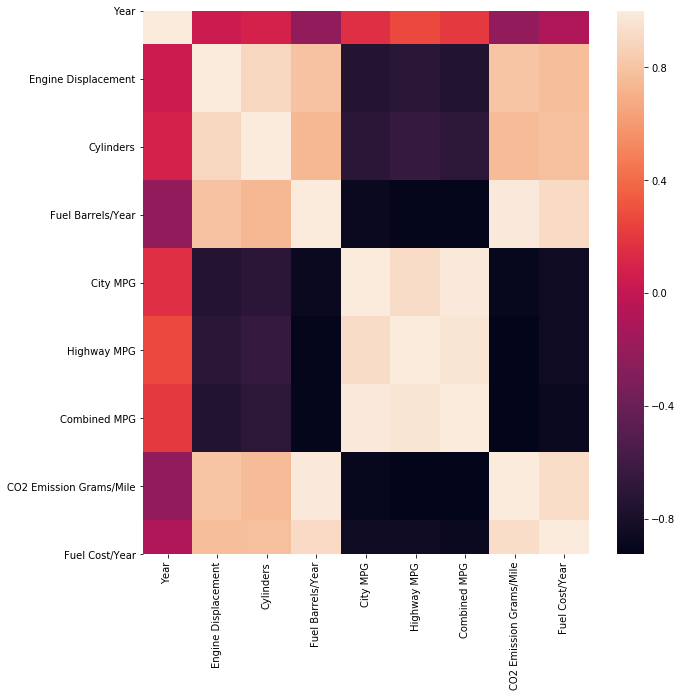

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(vehicles.corr(method='pearson'))
plt.show()

In [82]:
# ejemplo data analisis

students=pd.read_csv('data/student-mat.csv')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [83]:
students.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [84]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [88]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [94]:
pd.crosstab(index=students.sex, columns='count')

col_0,count
sex,
F,208
M,187


In [91]:
students.activities.head()

0     no
1     no
2     no
3    yes
4     no
Name: activities, dtype: object

In [92]:
students.sex.head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [90]:
pd.crosstab(index=students.sex, columns=students.activities)

activities,no,yes
sex,,
F,112,96
M,82,105


In [95]:
pd.crosstab(index=students.sex, columns=students.famsize)

famsize,GT3,LE3
sex,,
F,156,52
M,125,62


In [96]:
students['mejora']=np.where(students.G2>students.G1, 'mejora', 'no')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mejora
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mejora
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mejora
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,no
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mejora


In [97]:
pd.crosstab(index=students.school, columns=students.mejora)

mejora,mejora,no
school,,
GP,121,228
MS,7,39


In [100]:
students.pivot_table(index=['school'], columns=['sex', 'studytime'], values=['G3'], fill_value=0)

G3                                                  \
sex                F                                    M              
studytime          1          2          3   4          1          2   
school                                                                 
GP         10.652174   9.363636  10.590909  11  10.363636  11.090909   
MS          5.250000  10.428571  11.571429   0   8.750000  10.875000   

                            
sex                         
studytime          3     4  
school                      
GP         13.923077  11.7  
MS         13.000000   0.0

In [101]:
students.pivot_table(index=['school'], columns=['sex', 'studytime'], 
                     values=['G3'], fill_value=0, aggfunc='count')

G3                            
sex         F               M            
studytime   1   2   3   4   1   2   3   4
school                                   
GP         23  99  44  17  66  77  13  10
MS          4  14   7   0  12   8   1   0

In [102]:
students.pivot_table(index=['school'], columns=['sex', 'studytime'], 
                     values=['G3'], fill_value=0, aggfunc='mean')

G3                                                  \
sex                F                                    M              
studytime          1          2          3   4          1          2   
school                                                                 
GP         10.652174   9.363636  10.590909  11  10.363636  11.090909   
MS          5.250000  10.428571  11.571429   0   8.750000  10.875000   

                            
sex                         
studytime          3     4  
school                      
GP         13.923077  11.7  
MS         13.000000   0.0

In [103]:
students.pivot_table(index=['school'], columns=['sex', 'studytime'], 
                     values=['G3'], fill_value=0, aggfunc='max')

G3                            
sex         F               M            
studytime   1   2   3   4   1   2   3   4
school                                   
GP         18  18  19  18  19  19  18  20
MS         10  15  19   0  16  14  13   0

In [104]:
students.pivot_table(index=['school'], columns=['sex', 'studytime'], 
                     values=['G3'], fill_value=0, aggfunc='min')

G3                      
sex        F           M          
studytime  1  2  3  4  1  2   3  4
school                            
GP         0  0  0  0  0  0   9  0
MS         0  0  0  0  0  8  13  0

In [105]:
def suma(x):
    return x+2

In [109]:
students.pivot_table(index=['school'], columns=['sex', 'studytime'], 
                     values=['G3'], fill_value=0, aggfunc='mean').apply(suma)

G3                                                  \
sex                F                                    M              
studytime          1          2          3   4          1          2   
school                                                                 
GP         12.652174  11.363636  12.590909  13  12.363636  13.090909   
MS          7.250000  12.428571  13.571429   2  10.750000  12.875000   

                            
sex                         
studytime          3     4  
school                      
GP         15.923077  13.7  
MS         15.000000   2.0

In [110]:
students.pivot_table(index=['school'], columns=['sex', 'studytime'], 
                     values=['G3'], fill_value=0, aggfunc='mean')

G3                                                  \
sex                F                                    M              
studytime          1          2          3   4          1          2   
school                                                                 
GP         10.652174   9.363636  10.590909  11  10.363636  11.090909   
MS          5.250000  10.428571  11.571429   0   8.750000  10.875000   

                            
sex                         
studytime          3     4  
school                      
GP         13.923077  11.7  
MS         13.000000   0.0